In [457]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor



In [330]:
# importing the dataset
laptop_data=pd.read_csv('laptop_price.csv', encoding='Latin 1')
laptop_data.head(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00


In [334]:
# checking the shape 
laptop_data.shape

(1303, 13)

In [336]:
# checking the information
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [338]:
# checking for missng value
laptop_data.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [340]:
# checking for duplicated value
laptop_data.duplicated().sum()

0

In [405]:
# droping the  product column
laptop_data.drop('Product',axis=1,inplace=True)

In [342]:
# encoding the company column in the dataset
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, dtype=int)

# Ensure you pass the 'Company' column as a DataFrame
encoded_data = encoder.fit_transform(laptop_data[['Company']])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Company']))

# Concatenate the original DataFrame with the encoded DataFrame
laptop_data = pd.concat([laptop_data.drop('Company', axis=1), encoded_df], axis=1)



In [344]:
laptop_data.head(3)

,laptop_ID,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
0,1,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,...,0,0,0,0,0,0,0,0,0,0
1,2,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,0,0,0,0,0,0,0,0,0,0
2,3,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,...,0,0,0,0,0,0,0,0,0,0


In [346]:
# encoding the type name column in the dataset
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, dtype=int)

# Ensure you pass the 'Company' column as a DataFrame
encoded_data = encoder.fit_transform(laptop_data[['TypeName']])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['TypeName']))

# Concatenate the original DataFrame with the encoded DataFrame
laptop_data = pd.concat([laptop_data.drop('TypeName', axis=1), encoded_df], axis=1)

In [348]:
laptop_data.head(5)

,laptop_ID,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,1,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,0,0,0,0,0,0,0,0,1,0
1,2,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,0,0,0,0,0,0,0,0,1,0
2,3,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,0,0,0,0,0,0,0,1,0,0
3,4,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,0,0,0,0,0,0,0,0,1,0
4,5,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,0,0,0,0,0,0,0,0,1,0


In [350]:
# split the screen resolution and use it to create 2 new column

laptop_data['ScreenResolution']=laptop_data['ScreenResolution'].str.split(' ').apply(lambda x : x[-1])
laptop_data['ScreenWidth']=laptop_data['ScreenResolution'].str.split('x').apply(lambda x:x[0])
laptop_data['ScreenHeight']=laptop_data['ScreenResolution'].str.split('x').apply(lambda x:x[1])



In [352]:
laptop_data.head()

,laptop_ID,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,ScreenWidth,ScreenHeight
0,1,MacBook Pro,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,0,0,0,0,0,0,1,0,2560,1600
1,2,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,0,0,0,0,0,0,1,0,1440,900
2,3,250 G6,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,0,0,0,0,0,1,0,0,1920,1080
3,4,MacBook Pro,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,0,0,0,0,0,0,1,0,2880,1800
4,5,MacBook Pro,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,0,0,0,0,0,0,1,0,2560,1600


In [354]:
# dropping the screenresolution column
laptop_data.drop('ScreenResolution',axis=1,inplace=True)

In [356]:
# spliting the CPU column and extract new column from it
laptop_data['CpuBrand']=laptop_data['Cpu'].str.split(' ').apply(lambda x :x[0])
laptop_data['CpuFrequency']=laptop_data['Cpu'].str.split(' ').apply(lambda x :x[-1])


In [358]:
laptop_data.head(3)

,laptop_ID,Product,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,ScreenWidth,ScreenHeight,CpuBrand,CpuFrequency
0,1,MacBook Pro,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,0,0,0,0,1,0,2560,1600,Intel,2.3GHz
1,2,Macbook Air,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,...,0,0,0,0,1,0,1440,900,Intel,1.8GHz
2,3,250 G6,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,...,0,0,0,1,0,0,1920,1080,Intel,2.5GHz


In [360]:
# dropping the CPU column
laptop_data.drop('Cpu',axis=1,inplace=True)

In [362]:
# removing the last 3 letter from the cpufrequency column
laptop_data['CpuFrequency']=laptop_data['CpuFrequency'].str[:-3]

In [364]:
laptop_data.head(3)

,laptop_ID,Product,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Company_Acer,...,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,ScreenWidth,ScreenHeight,CpuBrand,CpuFrequency
0,1,MacBook Pro,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,...,0,0,0,0,1,0,2560,1600,Intel,2.3
1,2,Macbook Air,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,...,0,0,0,0,1,0,1440,900,Intel,1.8
2,3,250 G6,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,...,0,0,0,1,0,0,1920,1080,Intel,2.5


In [366]:
# removing the last 2 letter from the RAM column
laptop_data['Ram']=laptop_data['Ram'].str[:-2]

In [368]:
laptop_data.head(3)

,laptop_ID,Product,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Company_Acer,...,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,ScreenWidth,ScreenHeight,CpuBrand,CpuFrequency
0,1,MacBook Pro,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,...,0,0,0,0,1,0,2560,1600,Intel,2.3
1,2,Macbook Air,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,...,0,0,0,0,1,0,1440,900,Intel,1.8
2,3,250 G6,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,...,0,0,0,1,0,0,1920,1080,Intel,2.5


In [369]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   laptop_ID                    1303 non-null   int64  
 1   Product                      1303 non-null   object 
 2   Inches                       1303 non-null   float64
 3   Ram                          1303 non-null   object 
 4   Memory                       1303 non-null   object 
 5   Gpu                          1303 non-null   object 
 6   OpSys                        1303 non-null   object 
 7   Weight                       1303 non-null   object 
 8   Price_euros                  1303 non-null   float64
 9   Company_Acer                 1303 non-null   int32  
 10  Company_Apple                1303 non-null   int32  
 11  Company_Asus                 1303 non-null   int32  
 12  Company_Chuwi                1303 non-null   int32  
 13  Company_Dell      

In [372]:
# converting the datatype of some column
laptop_data['Ram']=laptop_data['Ram'].astype('int')
laptop_data['CpuFrequency']=laptop_data['CpuFrequency'].astype('float')
laptop_data['ScreenWidth']=laptop_data['ScreenWidth'].astype('int')
laptop_data['ScreenHeight']=laptop_data['ScreenHeight'].astype('int')

In [376]:
# spliting the memory column and create a new column
laptop_data['MemoryAmount']=laptop_data['Memory'].str.split(' ').apply(lambda x:x[0])
laptop_data['MemoryType']=laptop_data['Memory'].str.split(' ').apply(lambda x:x[1])


In [378]:
# creating a function to turn the GB or TB into MB
def turn_into_MB(value):
    if 'GB' in value:
        return float(value[:value.find('GB')]) * 1000
    elif 'TB' in value:
        return float(value[:value.find('TB')]) * 1000000
        

In [380]:
laptop_data['MemoryAmount']=laptop_data['MemoryAmount'].apply(turn_into_MB)

In [382]:
# droping the memory column
laptop_data.drop('Memory', axis=1,inplace=True)

In [384]:
laptop_data.head(3)

,laptop_ID,Product,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Company_Acer,Company_Apple,...,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,ScreenWidth,ScreenHeight,CpuBrand,CpuFrequency,MemoryAmount,MemoryType
0,1,MacBook Pro,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,...,0,0,1,0,2560,1600,Intel,2.3,128000.0,SSD
1,2,Macbook Air,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,...,0,0,1,0,1440,900,Intel,1.8,128000.0,Flash
2,3,250 G6,15.6,8,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,...,0,1,0,0,1920,1080,Intel,2.5,256000.0,SSD


In [386]:
# removing the last 2 letter from the Weight column
laptop_data['Weight']=laptop_data['Weight'].str[:-2]

In [387]:
# converting the datatype of weight column
laptop_data['Weight']=laptop_data['Weight'].astype('float')

In [390]:
# spliting the GPU column and create a new column
laptop_data['GpuBrand']=laptop_data['Gpu'].str.split(' ').apply(lambda x:x[0])

In [392]:
# droping the memory column
laptop_data.drop('Gpu', axis=1,inplace=True)

In [394]:
# encoding the type name column in the dataset
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, dtype=int)

# Ensure you pass the 'Company' column as a DataFrame
encoded_data = encoder.fit_transform(laptop_data[['OpSys']])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['OpSys']))

# Concatenate the original DataFrame with the encoded DataFrame
laptop_data = pd.concat([laptop_data.drop('OpSys', axis=1), encoded_df], axis=1)

In [396]:
laptop_data.head(3)

,laptop_ID,Product,Inches,Ram,Weight,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,...,GpuBrand,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,1,MacBook Pro,13.3,8,1.37,1339.69,0,1,0,0,...,Intel,0,0,0,0,0,0,0,0,1
1,2,Macbook Air,13.3,8,1.34,898.94,0,1,0,0,...,Intel,0,0,0,0,0,0,0,0,1
2,3,250 G6,15.6,8,1.86,575.00,0,0,0,0,...,Intel,0,0,0,0,1,0,0,0,0


In [398]:
# encoding the type name column in the dataset
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, dtype=int)

# Ensure you pass the 'Company' column as a DataFrame
encoded_data = encoder.fit_transform(laptop_data[['GpuBrand']])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['GpuBrand']))

# Concatenate the original DataFrame with the encoded DataFrame
laptop_data = pd.concat([laptop_data.drop('GpuBrand', axis=1), encoded_df], axis=1)

In [417]:
# encoding the type name column in the dataset
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, dtype=int)

# Ensure you pass the 'Company' column as a DataFrame
encoded_data = encoder.fit_transform(laptop_data[['CpuBrand']])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['CpuBrand']))

# Concatenate the original DataFrame with the encoded DataFrame
laptop_data = pd.concat([laptop_data.drop('CpuBrand', axis=1), encoded_df], axis=1)

In [427]:
# encoding the type name column in the dataset
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, dtype=int)

# Ensure you pass the 'Company' column as a DataFrame
encoded_data = encoder.fit_transform(laptop_data[['MemoryType']])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['MemoryType']))

# Concatenate the original DataFrame with the encoded DataFrame
laptop_data = pd.concat([laptop_data.drop('MemoryType', axis=1), encoded_df], axis=1)

In [419]:
laptop_data.head(3)

,laptop_ID,Inches,Ram,Weight,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,...,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,GpuBrand_AMD,GpuBrand_ARM,GpuBrand_Intel,GpuBrand_Nvidia,CpuBrand_AMD,CpuBrand_Intel,CpuBrand_Samsung
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,3,15.6,8,1.86,575.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


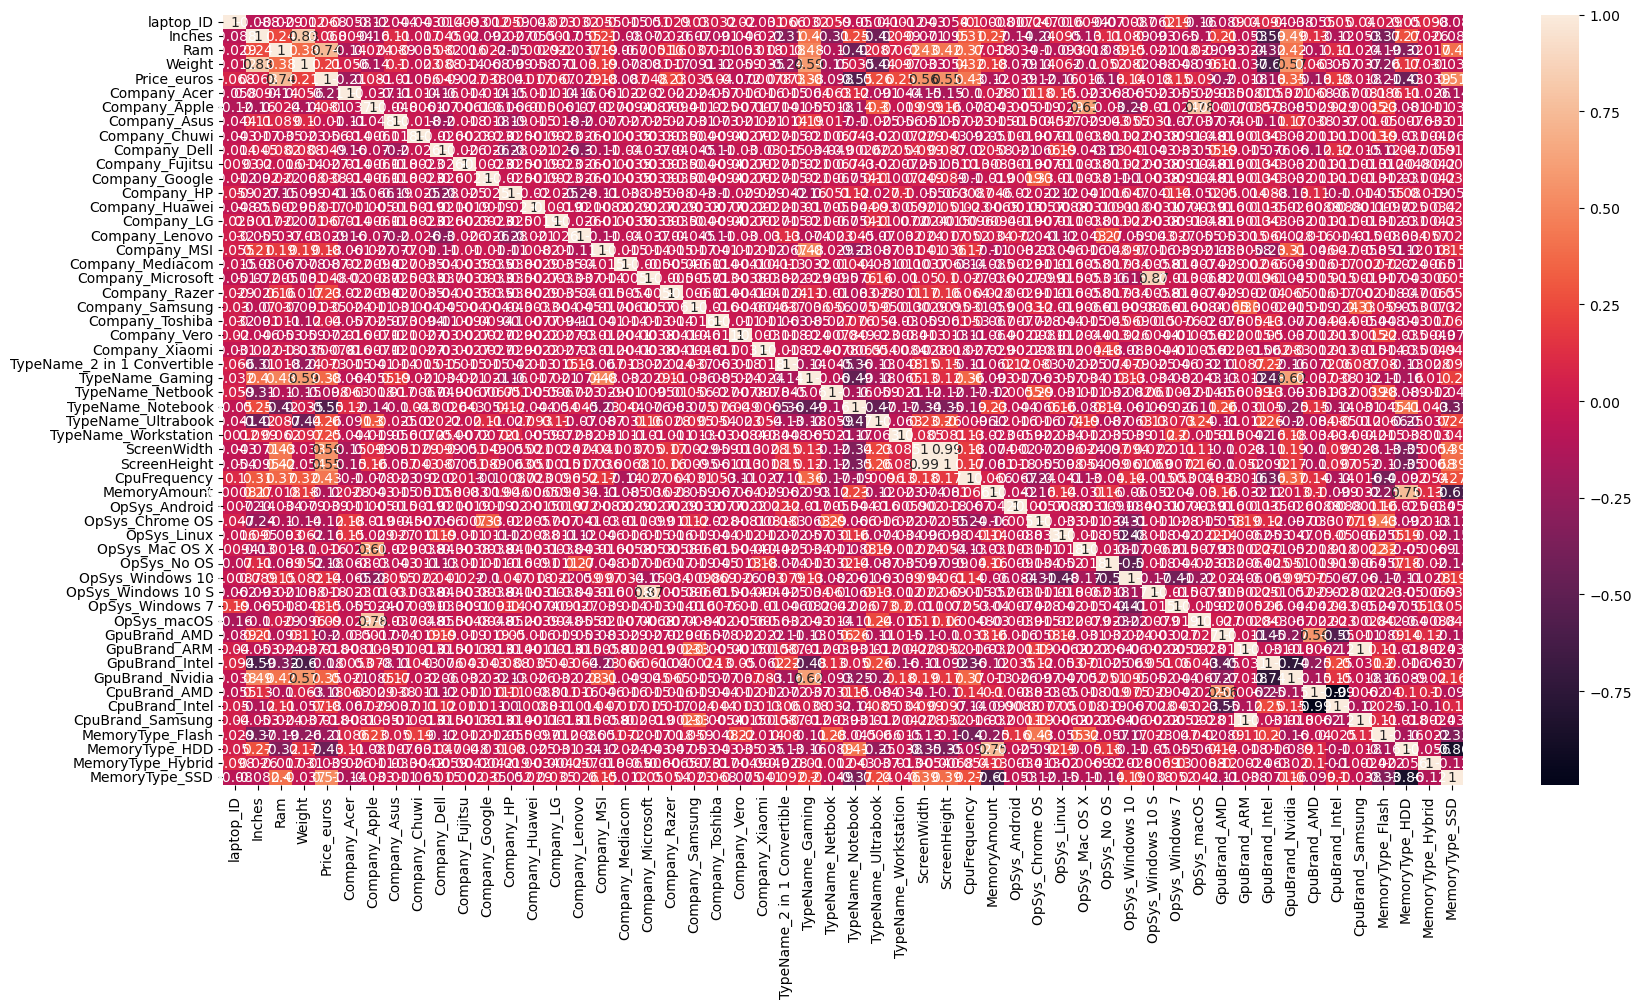

In [433]:
# visualizing the correlation
plt.figure(figsize=(20,10))
sns.heatmap(laptop_data.corr(), annot=True)
plt.show()



In [435]:
target_correlation =laptop_data.corr()['Price_euros'].apply(abs).sort_values()

In [437]:
target_correlation

Company_Xiaomi                 0.000776
Company_Asus                   0.010376
OpSys_Mac OS X                 0.015656
Company_Huawei                 0.016851
OpSys_Windows 10 S             0.018312
CpuBrand_Samsung               0.018431
GpuBrand_ARM                   0.018431
Company_Fujitsu                0.027135
Company_Lenovo                 0.029007
Company_Samsung                0.034584
Company_Google                 0.038086
OpSys_Android                  0.038700
MemoryType_Hybrid              0.039386
Company_Toshiba                0.040339
Company_HP                     0.041291
Company_Microsoft              0.047562
Company_Dell                   0.048509
Company_Chuwi                  0.055646
Company_LG                     0.067053
laptop_ID                      0.067830
Inches                         0.068197
Company_Vero                   0.071972
TypeName_2 in 1 Convertible    0.072675
Company_Apple                  0.080688
Company_Mediacom               0.087161


In [447]:
selected_features=target_correlation[-21:].index


In [449]:
selected_features=list(selected_features)

In [445]:
selected_features

['CpuBrand_AMD',
 'CpuBrand_Intel',
 'GpuBrand_Intel',
 'GpuBrand_AMD',
 'Company_Acer',
 'Weight',
 'MemoryType_Flash',
 'Company_Razer',
 'TypeName_Workstation',
 'TypeName_Ultrabook',
 'GpuBrand_Nvidia',
 'TypeName_Gaming',
 'MemoryType_HDD',
 'CpuFrequency',
 'MemoryType_SSD',
 'TypeName_Notebook',
 'ScreenHeight',
 'ScreenWidth',
 'Ram',
 'Price_euros']

In [451]:
final_laptop_data=laptop_data[selected_features]

In [453]:
final_laptop_data

,Company_MSI,CpuBrand_AMD,CpuBrand_Intel,GpuBrand_Intel,GpuBrand_AMD,Company_Acer,Weight,MemoryType_Flash,Company_Razer,TypeName_Workstation,...,GpuBrand_Nvidia,TypeName_Gaming,MemoryType_HDD,CpuFrequency,MemoryType_SSD,TypeName_Notebook,ScreenHeight,ScreenWidth,Ram,Price_euros
0,0,0,1,1,0,0,1.37,0,0,0,...,0,0,0,2.3,1,0,1600,2560,8,1339.69
1,0,0,1,1,0,0,1.34,1,0,0,...,0,0,0,1.8,0,0,900,1440,8,898.94
2,0,0,1,1,0,0,1.86,0,0,0,...,0,0,0,2.5,1,1,1080,1920,8,575.00
3,0,0,1,0,1,0,1.83,0,0,0,...,0,0,0,2.7,1,0,1800,2880,16,2537.45
4,0,0,1,1,0,0,1.37,0,0,0,...,0,0,0,3.1,1,0,1600,2560,8,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,1,1,0,0,1.80,0,0,0,...,0,0,0,2.5,1,0,1080,1920,4,638.00
1299,0,0,1,1,0,0,1.30,0,0,0,...,0,0,0,2.5,1,0,1800,3200,16,1499.00
1300,0,0,1,1,0,0,1.50,1,0,0,...,0,0,0,1.6,0,1,768,1366,2,229.00
1301,0,0,1,0,1,0,2.19,0,0,0,...,0,0,1,2.5,0,1,768,1366,6,764.00


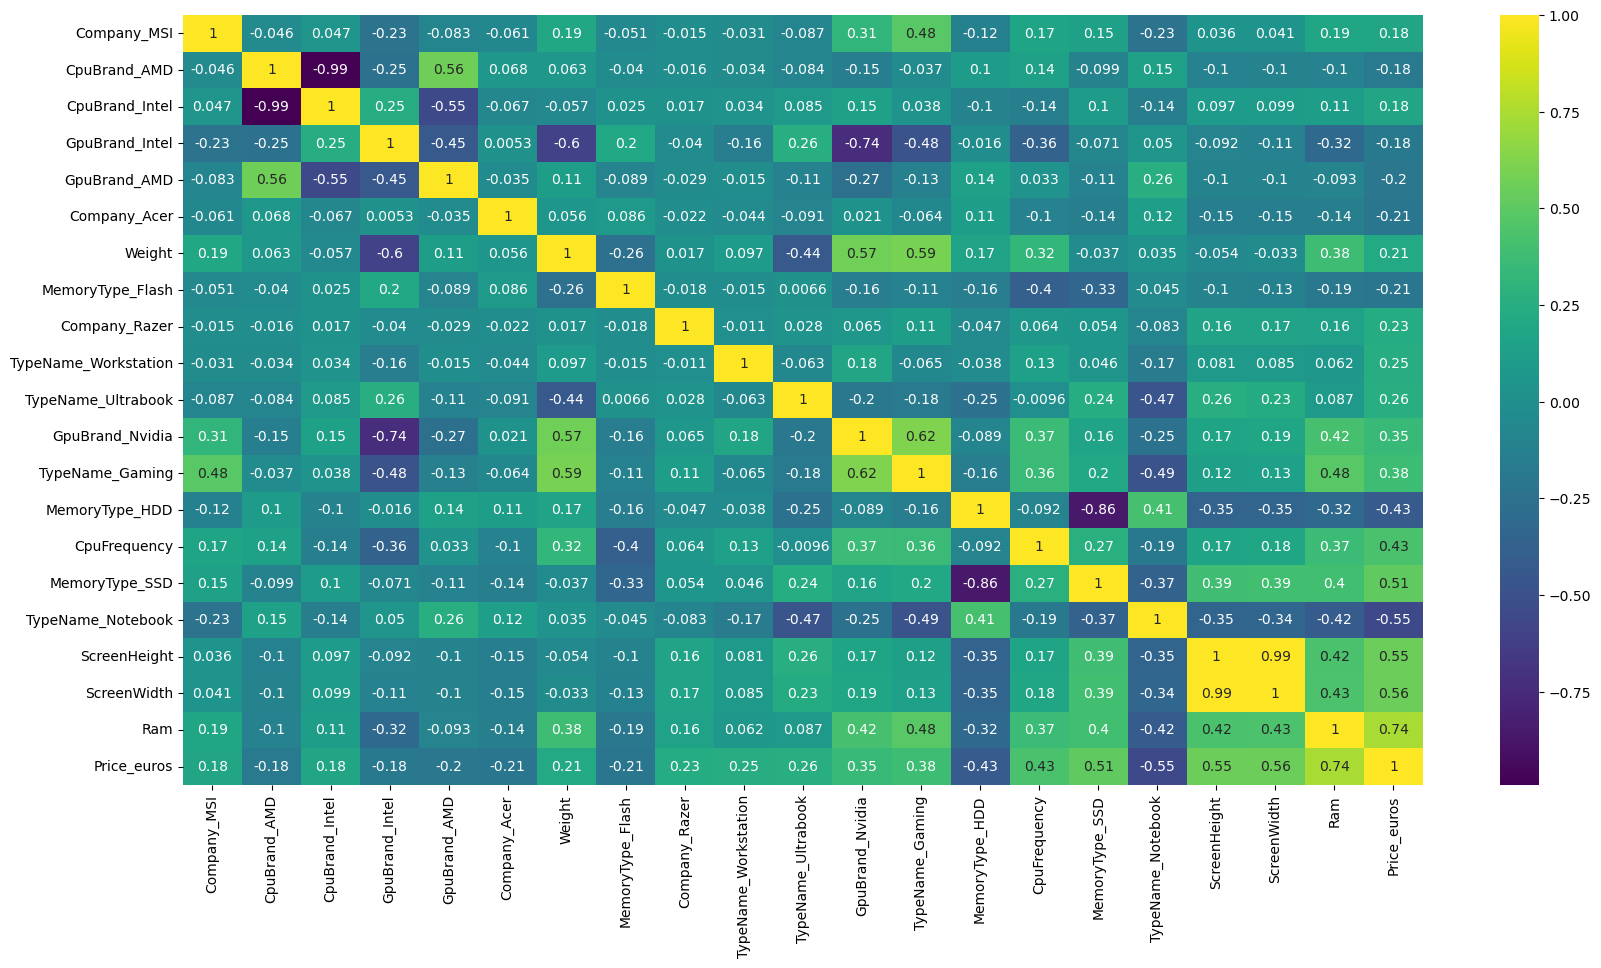

In [455]:
# visualizing the correlation
plt.figure(figsize=(20,10))
sns.heatmap(final_laptop_data.corr(), annot=True,cmap='viridis')
plt.show()

In [459]:
# spliting the data into prediction and target variables
X = final_laptop_data.drop('Price_euros',axis=1)
y = final_laptop_data['Price_euros']

In [473]:
# train test split the variables
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [475]:
# standardizing the Prediction variable
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [477]:
# initializing the model
forest=RandomForestRegressor()
forest.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [479]:
forest.score(X_test_scaled,y_test)

0.8285665276484323

In [481]:
y_pred=forest.predict(X_test_scaled)

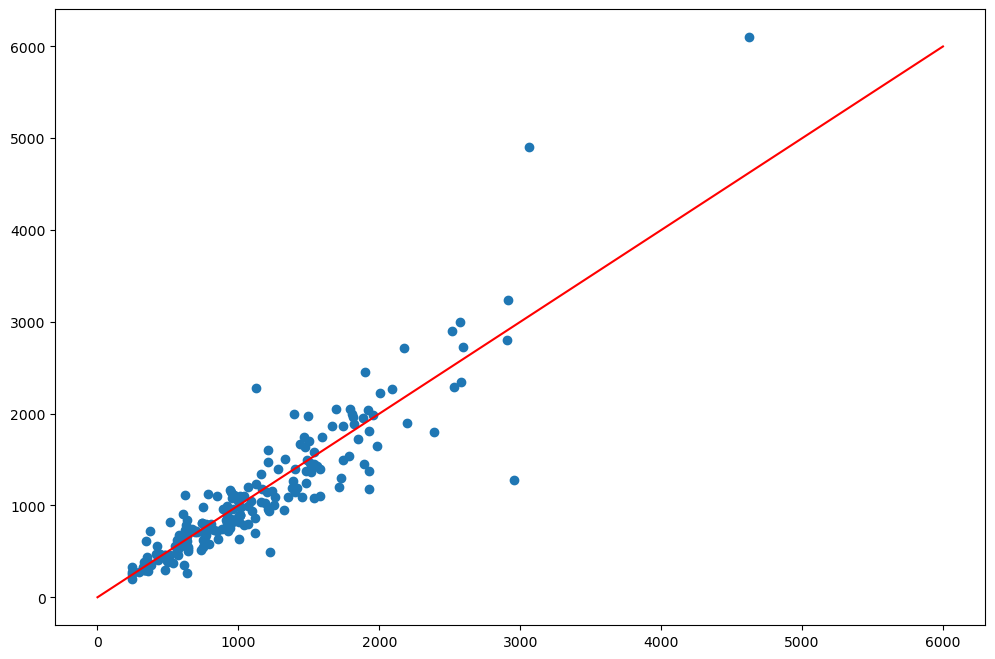

In [487]:
plt.figure(figsize=(12,8))
plt.scatter(y_pred,y_test)
plt.plot(range(0,6000),range(0,6000),c='red')
plt.show()



In [493]:
# testing the accuracy of the model on a new laptop information
X_new_scaled =scaler.transform([X_test.iloc[0]])
forest.predict(X_new_scaled)

array([1437.48])

In [495]:
y_test.iloc[0]

1672.0